<div style="text-align:center">
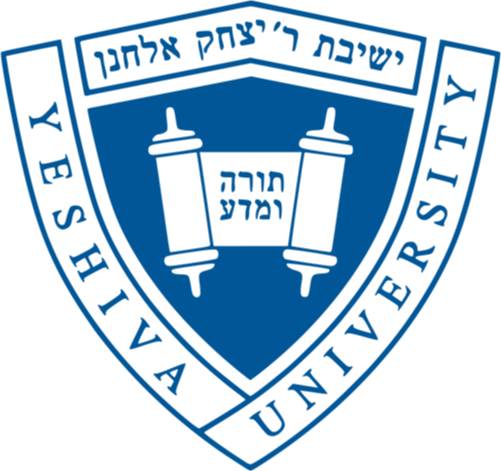
</div>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5004 Predictive Models</h1>
<p>
<h2 style='text-align: center;'>Homework 10</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

# Package import

In [1]:
# Import some important packages here
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# __1) Complete the function estimate(x, y, x0, h)__
The function should return $\widehat{Y}(x_0)$

In [4]:
def estimate(x, y, x0, h):
    w = np.exp( -(x - x0)**2 / h)
    W = np.diag(w)
    x = x[:, None]
    X = np.concatenate(
        (np.ones(shape = x.shape),
        (x - x0)), axis = 1
    )
    
    # Wighted linear regression coefficients B_hat = (Xᵀ W X)**−1 Xᵀ W y
    B_hat = np.linalg.inv(X.T @ W @ X) @ X.T @ W @ y

    # Estimation y_hat for x0
    x0 = np.array([[1, x0]])
    y_hat = x0 @ B_hat

    return y_hat


## __2) Generate 30 samples__
(x, y), where y is some interesting nonlinear function (of your schoosing) of the dependent variable, x. Plot both the samples and a curve that estimates $y(x)$ using function above for some reasonable-looking (to your eye) value of h.


In [155]:
def my_non_linear_function(x, a = 0.5, b = -1.5, c = 1, d = 0.5):
    return a * x**3 + b * x**2 + c * x + d + 0.5 * np.sin(x * 4 * np.pi) + 0.1 * np.random.normal(size = (x.size))

In [156]:
np.random.seed(2023)
n = 30
x = np.random.uniform(size = (n, ))
y = my_non_linear_function(x)

In [157]:
hs = np.array([0.01, 0.1, 0.5, 0.75, 1.0])

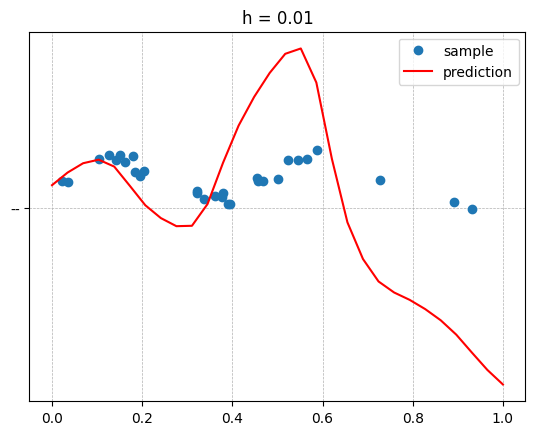

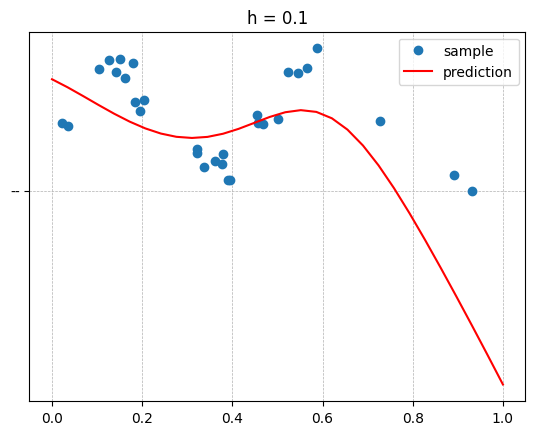

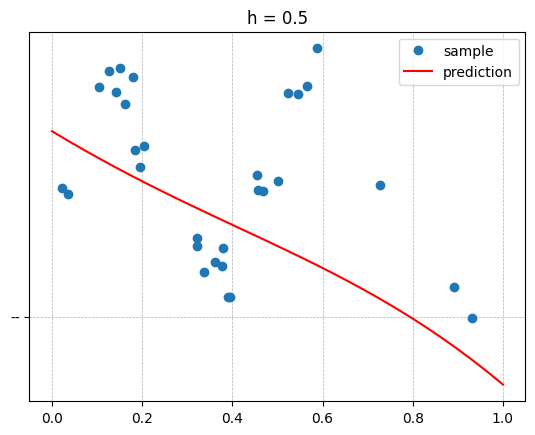

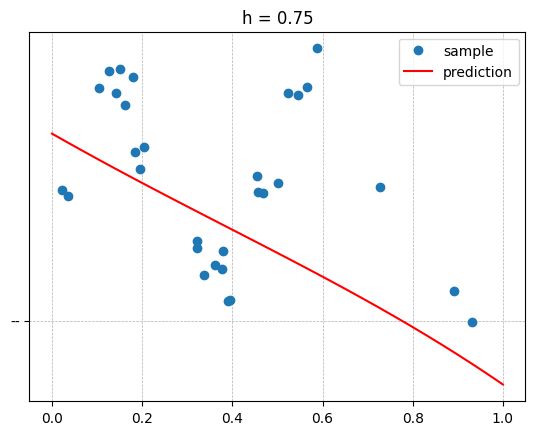

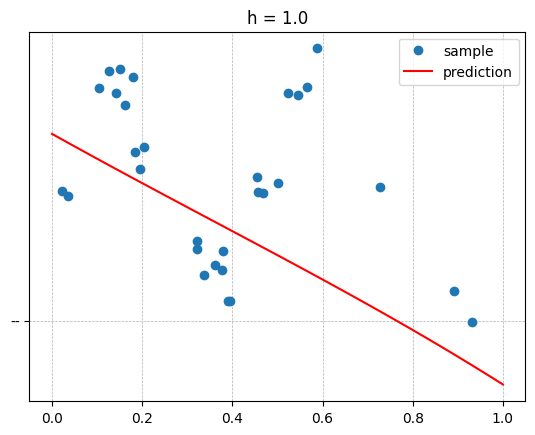

In [166]:
for h in hs:
    x_hat = np.linspace(0, 1, 30) 
    y_hat = np.array([estimate(x, y, x0, h) for x0 in x_hat])
    
    plt.figure()
    plt.plot(x, y, "o", label = "sampe")
    plt.plot(x_hat, y_hat, "r", "--", label = "prediction")
    plt.legend(["sample", "prediction"])
    plt.title(f"h = {h}")
    plt.grid(linestyle = "--", linewidth = 0.5)
    plt.show()

## __3) Tune h using LOOCV.__


In [172]:
def loocv_error(x, y, h):
    n = len(x)
    SSE = []
    
    for i in range(n):
        x_train = np.delete(x, i)
        y_train = np.delete(y, i)
        x_test = x[i]

        y_hat = estimate(x_train, y_train, x_test, h)
        error = (y[i] - y_hat)**2
        SSE.append(error)

    return np.mean(SSE)

In [173]:
errors = [loocv_error(x, y, h) for h in hs]

In [174]:
# Find the optimal h value
optimal_h = hs[np.argmin(errors)]
print(optimal_h)

0.1


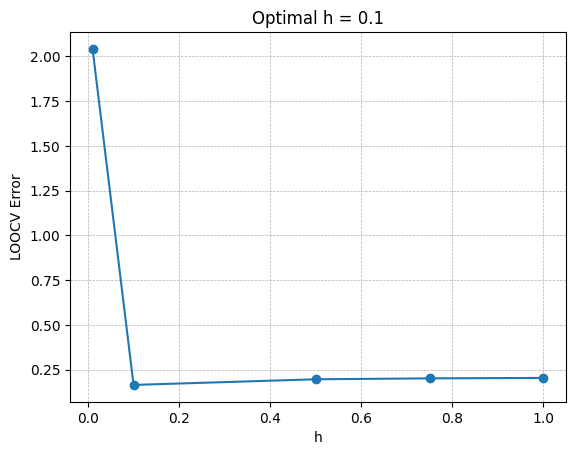

In [175]:
# Plot the results
plt.figure()
plt.plot(hs, errors, marker="o")
plt.xlabel("h")
plt.ylabel("LOOCV Error")
plt.title(f"Optimal h = {optimal_h}")
plt.grid(linestyle="--", linewidth=0.5)
plt.show()

# References

- LOO cross-validation with python  : https://data-fiend.github.io/third-post.html